# Image Compression Using KNN
I learned this from Andrew Ng's course on Unsupervised Learning

### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

### Data Collection

Picture to compress


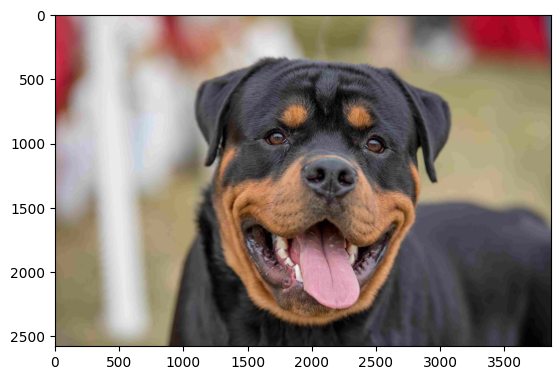

In [2]:
pic = plt.imread("/kaggle/input/goodboy-jpeg/goodBoy.jpg")
plt.imshow(pic)
print("Picture to compress")

### Creating and Demonstrating functions for KNN

In [3]:
def find_closest_center(X,centers):
    """
    X: np.array (data points)
    conters: np.array (current position of the centers)
    
    returns:
    ans: np.array (assigns all the points to a center)
    """
    K = len(centers)
    ans = [] #where assigned centers will be stored
    for i in X:
        dis = []
        for e in centers:
            norm = np.linalg.norm(np.array(e) - np.array(i)) #distance between points
            dis.append(norm) 
        ans.append(dis.index(min(dis))) #find minimum distance
    return ans

In [4]:
testCaseX = [[3,3], [-6,-2], [8,5]]
testCaseCenters = [[8,8],[1,3]]
find_closest_center(testCaseX,testCaseCenters)
#testing it

[1, 1, 0]

In [5]:
def compute_centroids(X,idx,K):
    """
    X: np.array (data points)
    idx: np.array (the assigned centers for every data points)
    K: int (number of centers)
    
    returns:
    ans: np.array (new position for all centers, avarged by their closest points)
    """
    X = np.array(X)
    idx = np.array(idx)
    ans = [] # where points position will be stored
    for i in range(K):
        closest = X[idx == i] #all points assigned to the current center
        ans.append(np.mean(closest,axis = 0)) #avarage of the points
    return ans

In [6]:
testCaseX = [[3,3], [-6,-2], [8,5]]
testCaseidx = [1,1,0]
testCaseK = 2
compute_centroids(testCaseX,testCaseidx,testCaseK)
#testing it

[array([8., 5.]), array([-1.5,  0.5])]

In [7]:
#you can use other np.arrays to filter arrays
example_data = np.array([1,2,3,4,5,6,7,8,9,10])
cut_data =     np.array([1,1,1,1,1,0,0,0,0,0])
example_data[cut_data == 1]
#for this to work, the data HAS to be np.array

array([1, 2, 3, 4, 5])

In [8]:
def find_random_points(pos,centers):
    """
    pos: np.array(np.array()) (all data points position)
    centers: int (number of centers)
    
    returns:
    ans: np.array() (initialzes the centers position by taking a random point on pos)
    """
    ans = [] #where new center positions are stored
    uniq = [] #makes sure all positions are unique
    for i in range(centers):
        while True:
            temp = random.randint(0,len(pos))#find a random point
            
            if temp not in uniq:#if not in ans
                ans.append(pos[temp])
                uniq.append(temp)
                break
    return ans

### Example of KNN / Data Visualization

[[3.5895356816348603, -1.0660804475255565], [7.527244736270242, 2.200384184034858], [7.045884892891706, 0.8585524948900423]]
These are the clusters:


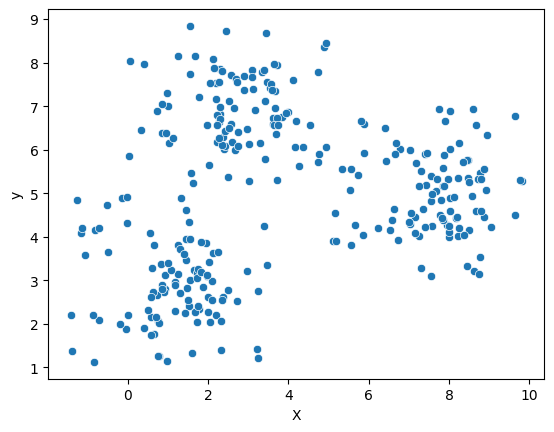

In [9]:
pos = []
X = []
y = []
center = [[5,8],[7,3],[3,1.5]]
radius = 1
examples = 100
#adding random points to test the KNN Algorithm
for e in center:
    for i in range(examples):
        temp = []
        if random.randint(0,1):
            temp.append(e[0] + random.uniform(-radius,radius)) 
            temp.append(e[1] + random.uniform(-radius,radius)) 
        else:
            temp.append(e[0] + random.uniform(-(radius + 1),radius + 1)) 
            temp.append(e[1] + random.uniform(-(radius + 2),radius + 1))
        pos.append(temp)
        X.append(temp[0])
        y.append(temp[1])
import seaborn as sns
test_data = pd.DataFrame(X,y).reset_index().rename(columns = {"index":"X",0:"y"})
sns.scatterplot(data = test_data,x = "X",y ="y")
print(find_random_points(pos,3))
print("These are the clusters:")


In [10]:
#making centers
centers = find_random_points(pos,3)#initialize points randomly

#training data
for i in range(25):#15 times to find clusters
    inx = find_closest_center(pos,centers)
    centers = compute_centroids(pos,inx,len(centers))
    
#points come out reverse, so this reverses it again
for x in range(len(centers)):
    centers[x] = centers[x][::-1]
print(centers)

[array([2.73412114, 6.91264717]), array([7.61342816, 4.9905439 ]), array([1.13234088, 2.9122144 ])]


Blue dots are data, and orange dots are the three groups that the computer could find


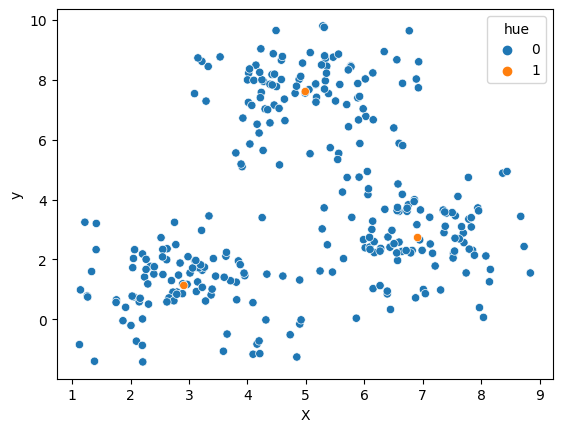

In [11]:
#creating dataset for data visualization
X = list(test_data["X"])
y = list(test_data["y"])
hue = ([0] * len(X)) + ([1] * 3) #makes points orange to see where the centers end up
for i in centers:
    X.append(i[0])
    y.append(i[1])
data = pd.DataFrame(X,y).reset_index().rename(columns = {"index":"X",0:"y"})
data["hue"] = hue
sns.scatterplot(data,x = "X",y = "y",hue = "hue")
print("Blue dots are data, and orange dots are the three groups that the computer could find")

### Data Processing

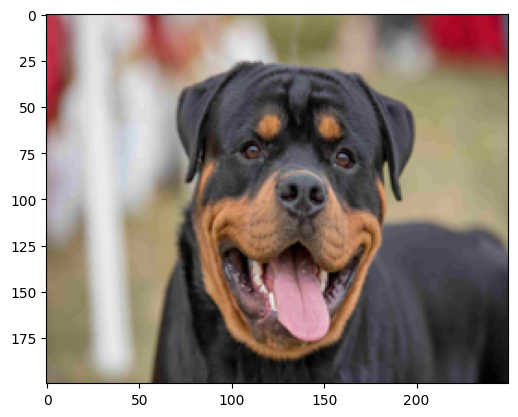

In [12]:
from PIL import Image 
pic = Image.open("/kaggle/input/goodboy-jpeg/goodBoy.jpg")
pic = pic.resize((250,200))#the training takes forever if the file isnt resized
pic = np.array(pic)
plt.imshow(pic)
proc = np.array(np.reshape(pic, (pic.shape[0] * pic.shape[1],3)))

In [13]:
#Initializing centers
K = 16
pos_c = find_random_points(proc,K)
pos_c
#these are the 16 colors that will be fine-tuned to match the photo

[array([34, 34, 34], dtype=uint8),
 array([53, 51, 66], dtype=uint8),
 array([139, 130,  94], dtype=uint8),
 array([196, 176, 143], dtype=uint8),
 array([22, 22, 22], dtype=uint8),
 array([222, 222, 222], dtype=uint8),
 array([182, 174, 137], dtype=uint8),
 array([194, 156, 143], dtype=uint8),
 array([156, 149, 111], dtype=uint8),
 array([135, 128,  79], dtype=uint8),
 array([226, 226, 226], dtype=uint8),
 array([194, 133, 101], dtype=uint8),
 array([40, 40, 40], dtype=uint8),
 array([28, 28, 28], dtype=uint8),
 array([224, 224, 224], dtype=uint8),
 array([135, 127,  96], dtype=uint8)]

### Training model

In [14]:
centers = pos_c
iterations = 10
#training data
for i in range(iterations):
    inx = find_closest_center(proc,centers)
    centers = compute_centroids(proc,inx,len(centers))
    print(str(i) +"/"+ str(iterations))#this takes some time,here is a counter
print(centers)
inx = find_closest_center(proc,centers)
#ensures all points are assigned to one of the 16 colors

0/10
1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
[array([38.69158879, 35.79785393, 35.17826237]), array([56.18881303, 53.10556723, 53.12578782]), array([145.10580205,  98.09769625,  72.70264505]), array([184.49137743, 166.62126173, 143.27308448]), array([115.40425532, 108.87304965, 111.9106383 ]), array([195.03091301, 178.03163192, 179.41445004]), array([165.93943541, 153.30111206, 121.63849444]), array([188.60911908, 132.30411687,  98.53917663]), array([143.30263494, 128.63980558,  96.90457918]), array([70.50935751, 68.54524407, 74.70982057]), array([224.2967312 , 224.35861631, 224.93652809]), array([165.87943787,  28.06213018,  48.47337278]), array([110.8688172 ,  71.19569892,  53.71899642]), array([17.74370923, 15.84808947, 15.75489282]), array([204.56378441, 202.88134936, 204.73671966]), array([86.19349668, 83.18868789, 93.18868789])]


In [15]:
pixels = []
for i in range(len(proc)):
    pixels.append(np.array(centers[inx[i]]))#assigning all points to color
pixels = np.reshape(pixels,(200,250,3))#reshaping data
pixels = np.array(pixels,dtype = np.uint8)#making all data integers
pixels[1][1]

array([165,  28,  48], dtype=uint8)

## Final Photo

This photo has only 16 colors in it


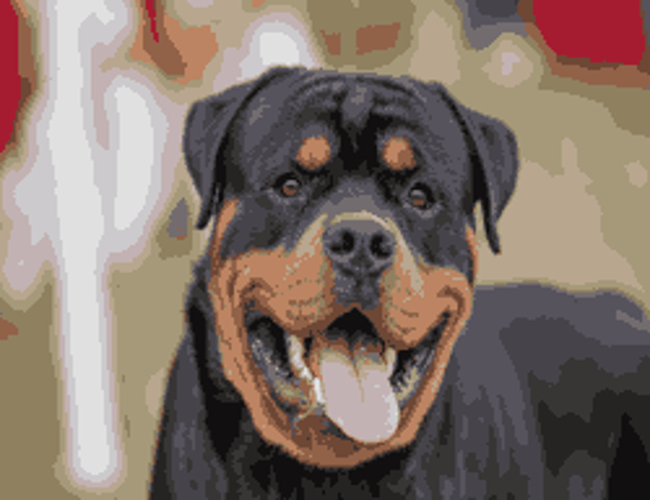

In [16]:
print("This photo has only 16 colors in it")
pic = Image.fromarray(pixels)
pic.resize((650,500))